# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)#1500
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)#1500
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #print(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather ['coord']['lat']
        city_lng = city_weather ['coord']['lon']
        city_max_temp = city_weather ['main']['temp_max']
        city_humidity = city_weather ['main']['humidity']
        city_clouds = city_weather ['clouds']['all']
        city_wind = city_weather ['wind']['speed']
        city_country = city_weather ['sys']['country']
        city_date = city_weather ['sys']['sunrise']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        #print(City_data)

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | lebu
Processing Record 3 of Set 1 | novaya ladoga
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | pevek
Processing Record 6 of Set 1 | rapid valley
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | ponta do sol
Processing Record 9 of Set 1 | vao
Processing Record 10 of Set 1 | east london
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | cayenne
Processing Record 13 of Set 1 | esperance
Processing Record 14 of Set 1 | yeppoon
Processing Record 15 of Set 1 | jacksonville
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | semey
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | hirara
Processing Record 22 of Set 1 | cherskiy
Processing Record 23 of Set 1 | longyearbyen
Proces

Processing Record 36 of Set 4 | salina
Processing Record 37 of Set 4 | homer
Processing Record 38 of Set 4 | lompoc
Processing Record 39 of Set 4 | praia da vitoria
Processing Record 40 of Set 4 | eyl
Processing Record 41 of Set 4 | sao filipe
Processing Record 42 of Set 4 | vanderhoof
Processing Record 43 of Set 4 | san cristobal
Processing Record 44 of Set 4 | calais
Processing Record 45 of Set 4 | upernavik
Processing Record 46 of Set 4 | kupang
Processing Record 47 of Set 4 | samalaeulu
City not found. Skipping...
Processing Record 48 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 49 of Set 4 | avarua
Processing Record 0 of Set 5 | dikson
Processing Record 1 of Set 5 | skalistyy
City not found. Skipping...
Processing Record 2 of Set 5 | imbituba
Processing Record 3 of Set 5 | tarko-sale
Processing Record 4 of Set 5 | huazolotitlan
City not found. Skipping...
Processing Record 5 of Set 5 | port-gentil
Processing Record 6 of Set 5 | baykit
Processing Record 7 of

Processing Record 25 of Set 8 | dali
Processing Record 26 of Set 8 | beyneu
Processing Record 27 of Set 8 | komsomolskiy
Processing Record 28 of Set 8 | muros
Processing Record 29 of Set 8 | teshie
Processing Record 30 of Set 8 | nanjing
Processing Record 31 of Set 8 | puerto gaitan
Processing Record 32 of Set 8 | marsh harbour
Processing Record 33 of Set 8 | seddon
Processing Record 34 of Set 8 | ndioum
Processing Record 35 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 36 of Set 8 | olinda
Processing Record 37 of Set 8 | orlova
Processing Record 38 of Set 8 | ayan
Processing Record 39 of Set 8 | mount gambier
Processing Record 40 of Set 8 | westport
Processing Record 41 of Set 8 | gubkinskiy
Processing Record 42 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 43 of Set 8 | sioux lookout
Processing Record 44 of Set 8 | peniche
Processing Record 45 of Set 8 | pochutla
Processing Record 46 of Set 8 | palmer
Processing Record 47 of Set 8 | samusu


Processing Record 12 of Set 12 | caibarien
Processing Record 13 of Set 12 | mamallapuram
Processing Record 14 of Set 12 | arroyo
Processing Record 15 of Set 12 | rio grande
Processing Record 16 of Set 12 | reconquista
Processing Record 17 of Set 12 | north bend
Processing Record 18 of Set 12 | berlevag
Processing Record 19 of Set 12 | ngunguru
Processing Record 20 of Set 12 | tilichiki
Processing Record 21 of Set 12 | swan river
Processing Record 22 of Set 12 | amapa
Processing Record 23 of Set 12 | strezhevoy
Processing Record 24 of Set 12 | dongying
Processing Record 25 of Set 12 | derzhavinsk
Processing Record 26 of Set 12 | losal
Processing Record 27 of Set 12 | medina
Processing Record 28 of Set 12 | utiroa
City not found. Skipping...
Processing Record 29 of Set 12 | la ronge
Processing Record 30 of Set 12 | kieta
Processing Record 31 of Set 12 | pirmasens
Processing Record 32 of Set 12 | linqu
Processing Record 33 of Set 12 | simbahan
Processing Record 34 of Set 12 | turayf
Proce

In [6]:
#city_data

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_dic = {"City": [d['City'] for d in city_data],"Lat": [d['Lat'] for d in city_data],
                "Lng": [d['Lng'] for d in city_data], "Max Temp": [d['Max Temp'] for d in city_data],
                "Humidity": [d['Humidity'] for d in city_data],
                "Cloudiness": [d['Cloudiness'] for d in city_data],
                "Wind Speed": [d['Wind Speed'] for d in city_data],
                "Country": [d['Country'] for d in city_data], "Date": [d['Date'] for d in city_data]}

city_data_df= pd.DataFrame(city_data_dic)

# Show Record Count
city_data_df.count()

City          542
Lat           542
Lng           542
Max Temp      542
Humidity      542
Cloudiness    542
Wind Speed    542
Country       542
Date          542
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,9.21,97,100,2.28,AR,1675328308
1,lebu,-37.6167,-73.6500,13.77,83,0,9.65,CL,1675332587
2,novaya ladoga,60.1025,32.3019,-5.07,95,100,3.51,RU,1675317846
3,punta arenas,-53.1500,-70.9167,14.06,58,100,3.09,CL,1675329339
4,pevek,69.7008,170.3133,-22.16,95,21,0.46,RU,1675289943


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,9.21,97,100,2.28,AR,1675328308
1,lebu,-37.6167,-73.6500,13.77,83,0,9.65,CL,1675332587
2,novaya ladoga,60.1025,32.3019,-5.07,95,100,3.51,RU,1675317846
3,punta arenas,-53.1500,-70.9167,14.06,58,100,3.09,CL,1675329339
4,pevek,69.7008,170.3133,-22.16,95,21,0.46,RU,1675289943


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

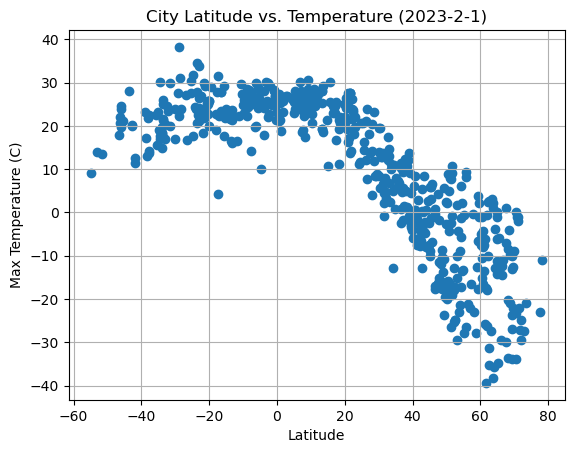

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Temperature (2023-2-1)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

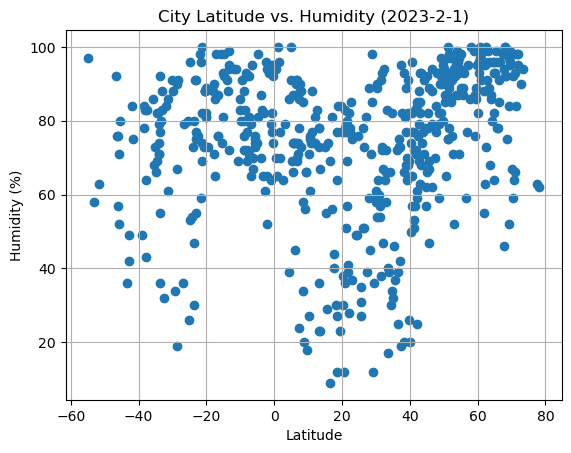

In [12]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2023-2-1)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

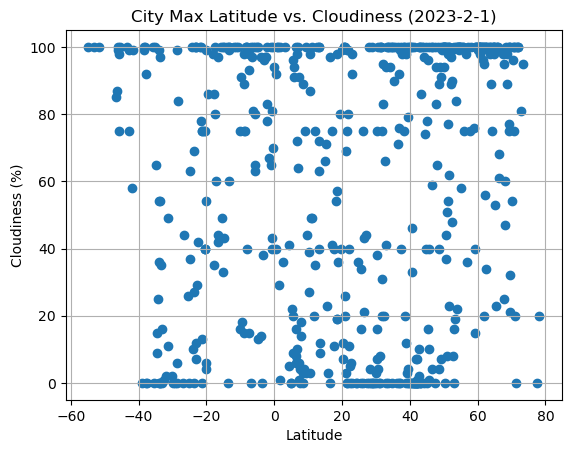

In [13]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Max Latitude vs. Cloudiness (2023-2-1)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

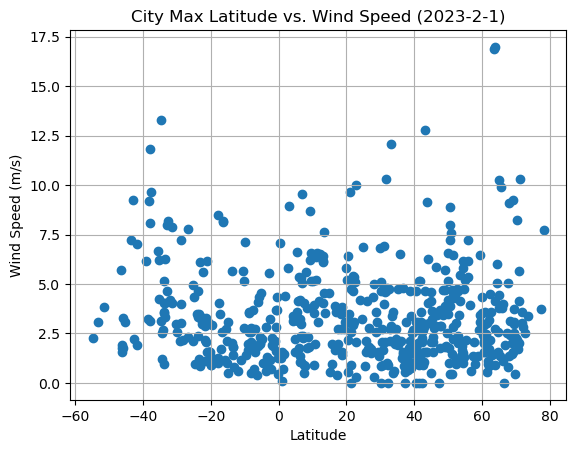

In [14]:
# Build scatter plot for latitude vs. Wind Speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Max Latitude vs. Wind Speed (2023-2-1)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def reg_plot (list1 , list2):
    x_values = list1
    y_values = list2
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return plt.scatter(x_values,y_values), plt.plot(x_values,regress_values,"r-"), plt.annotate(line_eq,(min(x_values)+1,min(y_values)+1),fontsize=15,color="red"), plt.xlabel('Latitude'), plt.ylabel(f"{list2.name}"), print(f"The r-squared is: {rvalue**2}")

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,novaya ladoga,60.1025,32.3019,-5.07,95,100,3.51,RU,1675317846
4,pevek,69.7008,170.3133,-22.16,95,21,0.46,RU,1675289943
5,rapid valley,44.0625,-103.1463,0.63,71,0,4.02,US,1675260621
7,ponta do sol,32.6667,-17.1000,17.35,64,66,4.74,PT,1675324963
11,cayenne,4.9333,-52.3333,23.02,100,0,1.54,GF,1675331129


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]< 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,9.21,97,100,2.28,AR,1675328308
1,lebu,-37.6167,-73.6500,13.77,83,0,9.65,CL,1675332587
3,punta arenas,-53.1500,-70.9167,14.06,58,100,3.09,CL,1675329339
6,vaini,-21.2000,-175.2000,29.09,74,75,6.17,TO,1675358634
8,vao,-22.6667,167.4833,26.80,76,29,2.96,NC,1675276225


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7482238008678797


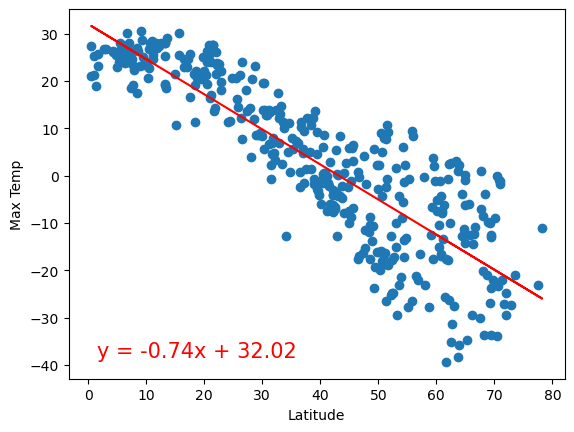

In [18]:
# Linear regression on Northern Hemisphere
reg_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

plt.show()

The r-squared is: 0.13569947990743106


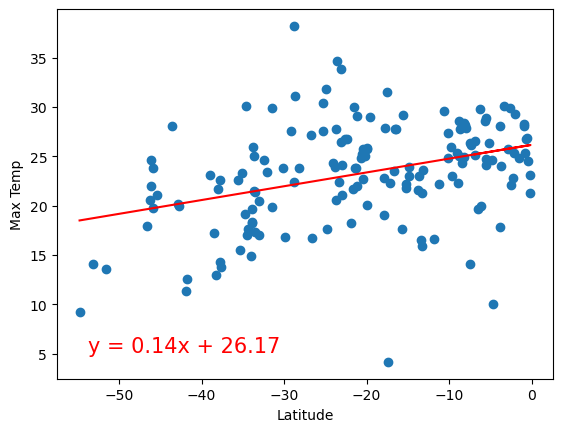

In [19]:
# Linear regression on Southern Hemisphere
reg_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

plt.show()

In [20]:
print ("\033[1m" + "**Discussion about the linear relationship:**\n "
       +" when Latitude goes close to  0 (i.e, closer to equator the temperature goes up)")

**Discussion about the linear relationship:**
  when Latitude goes close to  0 (i.e, closer to equator the temperature goes up)


### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.17052018479384978


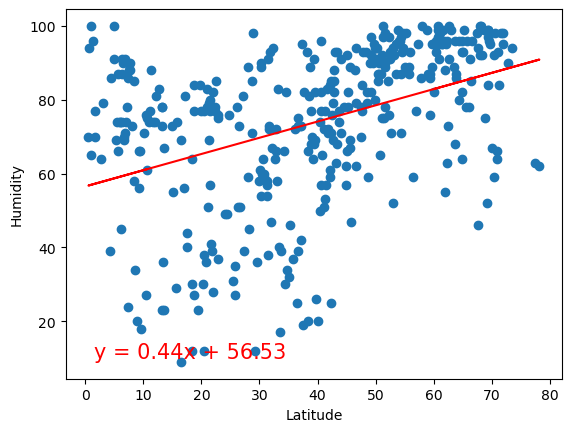

In [21]:
# Northern Hemisphere
reg_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

plt.show()

The r-squared is: 0.08173591680144783


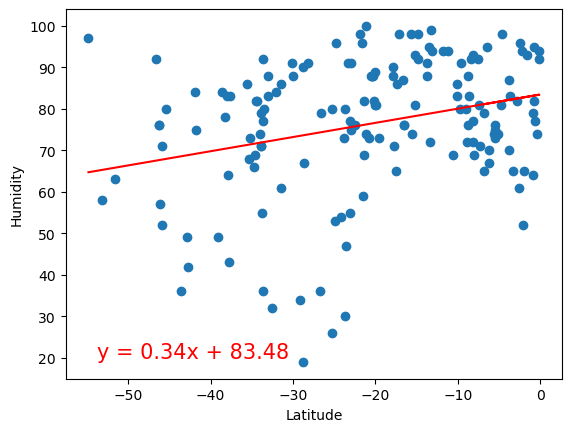

In [22]:
# Southern Hemisphere
reg_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

plt.show()

In [23]:
print ("\033[1m" + "**Discussion about the linear relationship:**\n "
       +" Humidity in north pole is hgher than equator versus the south pole is less humid ")

**Discussion about the linear relationship:**
  Humidity in north pole is hgher than equator versus the south pole is less humid 


### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.10122693256790467


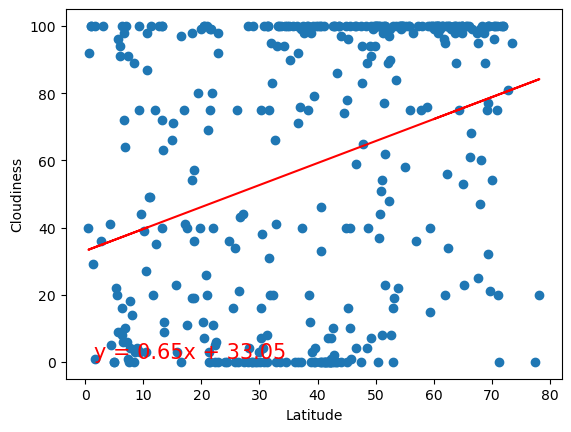

In [24]:
# Northern Hemisphere
reg_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

plt.show()

The r-squared is: 0.015020707310794478


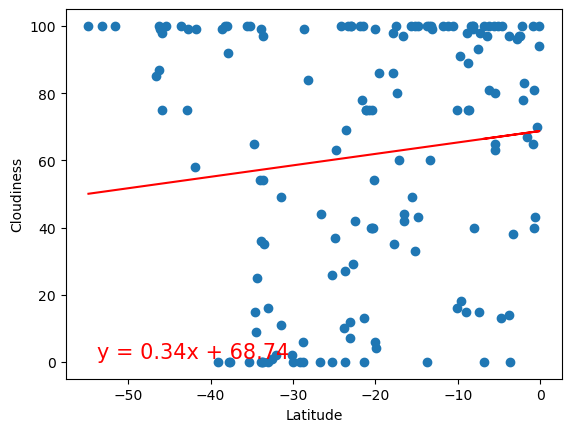

In [25]:
# Southern Hemisphere
reg_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

plt.show()

In [26]:
print ("\033[1m" + "**Discussion about the linear relationship:**\n "
       +" going from south pole to equator and conitueing going up toward the north pole will result in more cloud ")

**Discussion about the linear relationship:**
  going from south pole to equator and conitueing going up toward the north pole will result in more cloud 


### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 4.392335548173922e-06


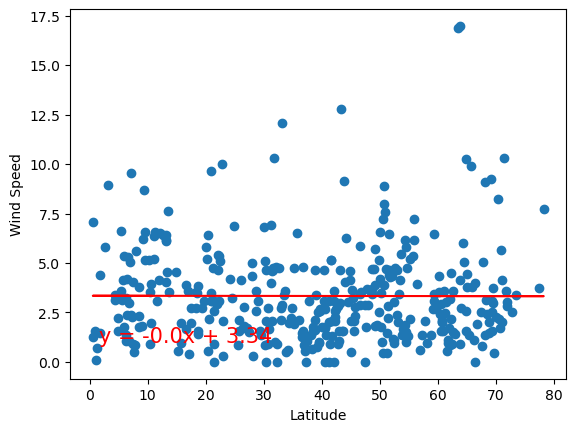

In [27]:
# Northern Hemisphere
reg_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

plt.show()

The r-squared is: 0.12810037689095105


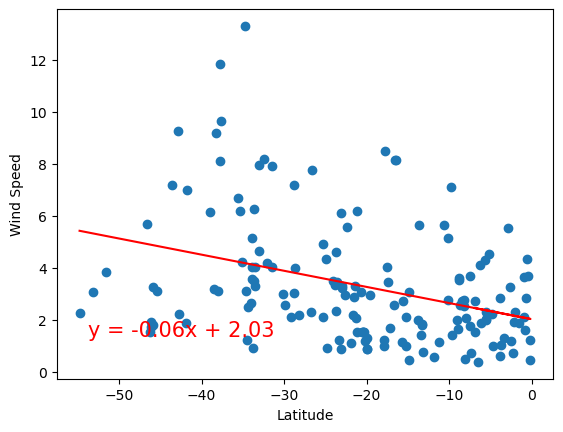

In [28]:
# Southern Hemisphere
reg_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

plt.show()

In [29]:
print ("\033[1m" + "**Discussion about the linear relationship:**\n "
       +" wind speed in relatively higher at north and south pole in compare to equator ")

**Discussion about the linear relationship:**
  wind speed in relatively higher at north and south pole in compare to equator 
